<a href="https://colab.research.google.com/github/Vineet3006/Data_Science/blob/main/Copy_of_Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [274]:
#Importing libraries
import ast
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [275]:
data = pd.read_csv('train.csv')

In [276]:
data.head(5)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [64]:
data.shape

(3000, 23)

In [65]:
data.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [277]:
#Droping columns

data = data.drop(["homepage", "imdb_id", "original_title","poster_path", "status", "Keywords", "spoken_languages", "tagline", "title"], axis=1)

In [278]:
len(data.columns)

14

In [68]:
data.dtypes

id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
original_language         object
overview                  object
popularity               float64
production_companies      object
production_countries      object
release_date              object
runtime                  float64
cast                      object
crew                      object
revenue                    int64
dtype: object

In [69]:
data.shape

(3000, 14)

In [224]:
#Checking missing values

data.isna().sum()

id                      0
budget                  0
genres                  0
original_language       0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
runtime                 0
cast                    0
crew                    0
revenue                 0
dtype: int64

In [279]:
#Droping belongs_to_collection column

data = data.drop(["belongs_to_collection"], axis=1)

In [280]:
data = data.dropna() 
  
# To reset the indices  
data = data.reset_index(drop = True) 

In [74]:
data.shape

(2812, 13)

In [92]:
import datetime

In [281]:
data ["release_date"] = pd.to_datetime(data ["release_date"], errors='coerce')

In [282]:
data['year'] = data['release_date'].dt.year

In [78]:
data.dtypes

id                               int64
budget                           int64
genres                          object
original_language               object
overview                        object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
runtime                        float64
cast                            object
crew                            object
revenue                          int64
year                             int64
dtype: object

In [283]:
import ast
data['genres'] = data['genres'].map(lambda x: ast.literal_eval(x))
data['cast'] = data['cast'].map(lambda x: ast.literal_eval(x))
data['crew'] = data['crew'].map(lambda x: ast.literal_eval(x))
data["production_companies"] = data["production_companies"].map(lambda x: ast.literal_eval(x))
data["production_countries"] = data["production_countries"] .map(lambda x: ast.literal_eval(x))

In [284]:
#
def get_details(x, y):
    dt = []
    st = " "
    for i in x:
      dt.append(i.get(y))

    if dt == []:
      return st
    else:
        return (st.join(dt))

In [285]:
data["genres_list"] = data["genres"].map(lambda x: get_details(x, "name"))

In [286]:
data['cast_list'] = data['cast'].map(lambda x: get_details(x, "name"))

In [287]:
data['crew_list'] = data['crew'].map(lambda x: get_details(x, "name"))

In [288]:
data["production_companies_list"] = data["production_companies"].map(lambda x: get_details(x, "name"))

In [289]:
data["production_countries_list"] = data["production_countries"] .map(lambda x: get_details(x, "name"))

In [234]:
data['genres_list'].head(2)

0                         Comedy
1    Comedy Drama Family Romance
Name: genres_list, dtype: object

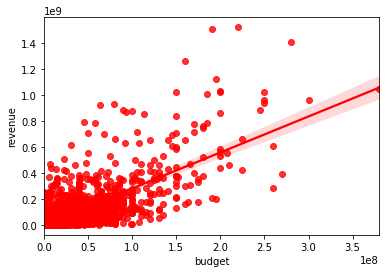

In [105]:
# relationship between Budget and Revenue

sns.regplot(x="budget", y="revenue", data=data, color = 'red')

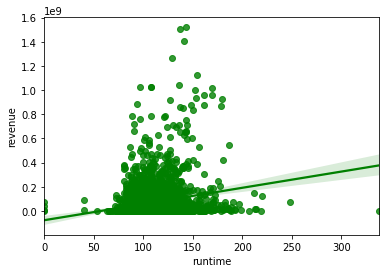

In [107]:
# relationship between Runtime and Revenue

sns.regplot(x="runtime", y="revenue", data=data, color = 'green')

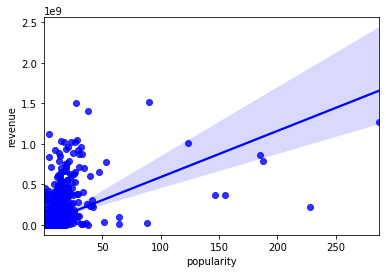

In [109]:
# relationship between Revenue and Popularity

sns.regplot(x="popularity", y="revenue", data=data, color = 'blue')

In [290]:
#Droping columns with dict as already converted into list

data = data.drop(["genres", "cast", "crew", "production_companies", "production_countries"], axis=1)

In [291]:
#

data = data.drop(["release_date"], axis=1)

In [292]:
#selecting columns for normalization

data1 = data [["budget","popularity","runtime", "year", "revenue"]]

In [293]:
data1.head(2)

,budget,popularity,runtime,year,revenue
0,14000000,6.575393,93.0,2015,12314651
1,40000000,8.248895,113.0,2004,95149435


In [294]:
from sklearn.preprocessing import StandardScaler
Scalar = StandardScaler()

In [295]:
data1 = Scalar.fit_transform(data1)

In [296]:
data1.shape

(2812, 5)

In [299]:
#converted ndarray to dataframe

new_data = pd.DataFrame(data1, columns = ['budget','popularity','runtime', 'year','revenue'])

In [300]:
new_data.head(2)

,budget,popularity,runtime,year,revenue
0,-0.254473,-0.194740,-0.724451,0.604470,-0.413143
1,0.443369,-0.043549,0.217456,-0.072557,0.186939


In [301]:
#data for text columns

data2 = data [["original_language","overview","genres_list", "cast_list", "crew_list", "production_companies_list", "production_countries_list"]]

In [302]:
#combine all text columns into one column

data2["final_text"] = data2["original_language"]+" "+ data2["overview"]+ " "+data2["genres_list"]+ " "+data2["cast_list"] +" "+ data2["crew_list"] + " "+ data2["production_companies_list"] + " "+ data2["production_countries_list"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [303]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [304]:
#TF-IDF Vectorizer

vec = vectorizer.fit_transform(data2['final_text'])

In [305]:
dtm = vec.toarray()

In [306]:
new_data2 = pd.DataFrame(data=dtm[1:,1:])

In [307]:
new_data2.shape

(2811, 58981)

In [308]:
#joining

main_data = pd.concat([new_data,new_data2], axis=1)

In [309]:
main_data.shape

(2812, 58986)

In [310]:
#importing keras libraries

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [313]:
X = main_data.drop(["revenue"], axis=1)

In [312]:
y = main_data["revenue"]

In [2]:
#model creation

def model():

	model = Sequential()
	model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
 
	# compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [3]:
# evaluate model
estimator = KerasRegressor(build_fn=model, epochs=50, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)


NameError: ignored

In [ ]:
results = cross_val_score(estimator, X, y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distrib